<a href="https://colab.research.google.com/github/Zaratti/BigGAN-Capstone-Project-Proposal/blob/main/BigGAN_Project_Documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

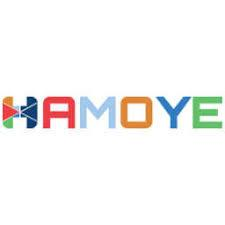

USING GENERATIVE AI TO FORECAST ELECTRICITY DEMAND AND SUPPLY GAPS: SUB-SAHARAN AFRICA VS. OTHER CONTINENT REGIONS

Team BigGAN Capstone Project Documentation, Spring ‘24 Cohort

Arthur Uzoma

Abosede Omishade

Nina Garmash

Somi Fredrick

Nishant Katiyar

Bharat Kumar Jhawar

Adeniyi Olaolu

Arnab Das

Sayantani Jana

Emmanuel Alafaa

Tolulope Oke

Ademo Vitalis

Abiodun Onifade

Oluchukwu Okorie

Solomon Yomi

**Introduction.** Electricity is crucial for both economic growth and social development. However, around 600 million people in Sub-Saharan Africa (SSA) still lack access to electricity, posing a significant challenge to achieving Sustainable Development Goal (SDG) 7, which aims for universal access to modern energy by 2030 (African Union Commission, 2021; International Energy Agency, 2023). This deficiency affects education, healthcare, business operations, and the overall quality of life (World Health Organization, 2022). To address this issue, innovative methods are required to accurately predict and manage electricity demand and supply gaps. According to the 2023 UN report, "Tracking SDG 7: The Energy Progress Report," the COVID-19 pandemic has slowed progress in increasing electricity access in SSA, and the situation remains critical due to rising energy prices since mid-2021. In 2021, 675 million people globally were without electricity, with 567 million of them in SSA, making up over 80% of the global population without electricity.

**Problem Statement**. This project aims to utilize Generative AI algorithms to create models for predicting electricity demand and supply gaps in Sub-Saharan Africa compared to other regions. A comprehensive approach is needed to identify areas with the greatest need, and guide targeted interventions.

**Aims & Objectives.** The aim is to promote sustainable and equitable electrification, advancing universal energy access and enhancing socio-economic development throughout Sub-Saharan Africa. The objectives include:

 **.**Examine the electrification disparities between Sub-Saharan Africa and other regions to derive data-driven insights that will inform targeted and effective interventions.
 **.**Apply machine learning techniques to predict the electricity demand and supply gap in Sub-Saharan Africa by integrating socio-economic, environmental, and technological factors. This will provide reliable forecasts and actionable insights for enhancing electricity access and resource allocation in the region.
 **.**Assessing and deploying a Generative AI model that will allow it to dynamically adapt to new data inputs, continuously improving predictions and intervention strategies over time.
**Data Understanding.** Several recommended and additional data sources were explored to find indicators related to electricity generation/consumption and general socio-economic metrics (e.g., population, income group, GDP per capita, etc.) that might influence these factors. Most recent yearly data for SSA countries and regions were found in World Bank Open Data, Our World in Data, Ember - Yearly Electricity Data, UN Data - United Nations Data Retrieval System, and Tracking SDG 7 - The Energy Progress Report. To measure the gap between electricity demand and supply new metrics were introduced: **SUPPLY RATE** - the amount of electricity delivered per 1% of the population with access to electricity, TWh/%: SUPPLY(total electricity supplied in a country) / ACCESS(percentage of the population with Access to electricity). **TARGET DEMAND** - the amount of electricity needed to provide access to 100% of the population, TWh): 100% * SUPPLY RATE. **GAP** - the missing amount of electricity, representing the difference between what is needed and what is delivered, TWh: TARGET DEMAND - SUPPLY

**Data Preparation.** Relevant indicators were taken from 5 sources and merged in one dataset (2166 rows, 39 columns), representing 49 SSA countries and world regions in years 1990-2023. Data cleaning included data types correction, units of measurement standardization, categorical variables encoding into numerical, editing column names, imputation of missing 'net_imports' values from ‘electricity_imports’ and ‘electricity_exports’. This dataset with all extracted indicators is used to compare SSA with other regions and countries within SSA, to analyze relations between metrics with plots and Tableau dashboards.

For modeling we created a robust subset of data, containing only SSA Countries(1104 rows, 31 cols):


**.**years 1990-1999 and 2023 with most NaNs were filtered out,

**.**12 less important or highly correlated indicators were excluded,

**.**rows for South Sudan were dropped (its data is incomplete since it was part of Sudan before 2011),

**.**missing values in the 'renewables_other' column for South Africa were replaced with the mean for countries with Upper middle income.

**.**remaining missing values were imputed using the Prophet model (after four different methods like forward/backward fill, interpolation, KNNImputer, and Prophet model were tested and compared).

**Exploratory Data Analysis.** First, all available regional data were examined to determine Sub-Saharan Africa’s position among other regions. SSA is last in the world in Electricity Generation per capita and Access to Electricity (51%), with a large disparity between the urban and rural populations (81% vs. 30%). Although Access to Electricity and electricity generation in SSA are growing over the years, the population is also growing rapidly. In 2022, 571,238,800 people in SSA still did not have access to electricity.

The cleaned data was further studied and the columns which actually influence the electrification demand and supply in African countries were segregated and analyzed. Various graphs were drawn using Python and Power BI to uncover insights. Here are the results:

a.Correlation between electricity access and income levels: High-income households enjoy nearly universal electricity access (94%-100%). In contrast, middle-income groups face slightly more limited access. However, the most striking trend emerges in the lower-income bracket, where a significant proportion of values fall below 30%, indicating a substantial lack of electricity access. This clear and troubling pattern underscores the pressing issue of energy inequality in Africa.

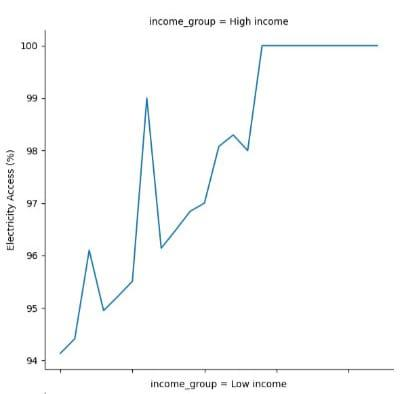

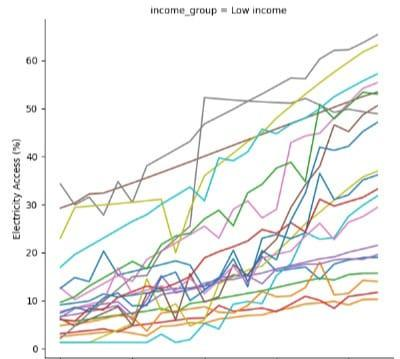

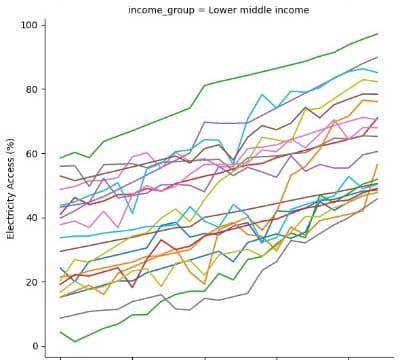

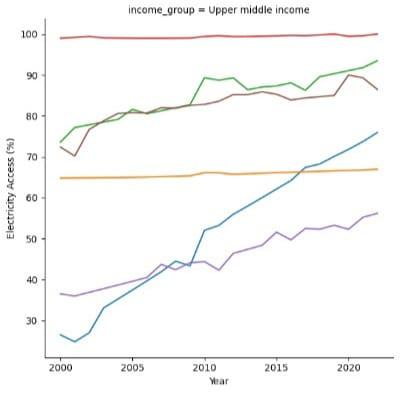



b. Electricity access data across SSA: only a negligible fraction of countries have achieved above 80% total electricity access. Alarmingly, a significant cluster of countries falls below the 20% threshold.

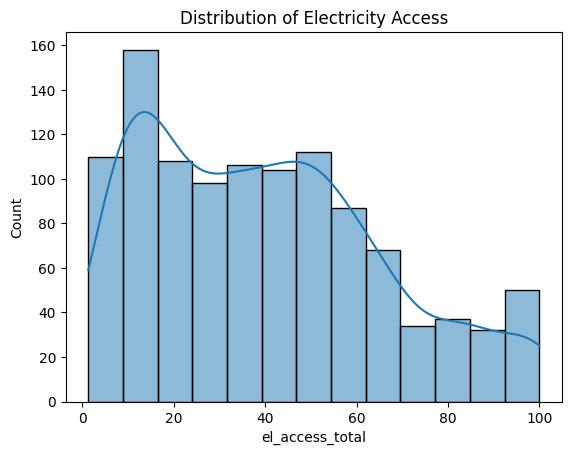

c. Significant disparity in SSA’s energy production. Africa's renewable energy supply is substantially lower than that of other continents. Furthermore, in the non-renewable energy sector, Africa's supply is remarkably low, falling below 100,000 units. In contrast, other continents boast a supply of nearly 200,000 units, with Asia surpassing this threshold by a considerable margin.

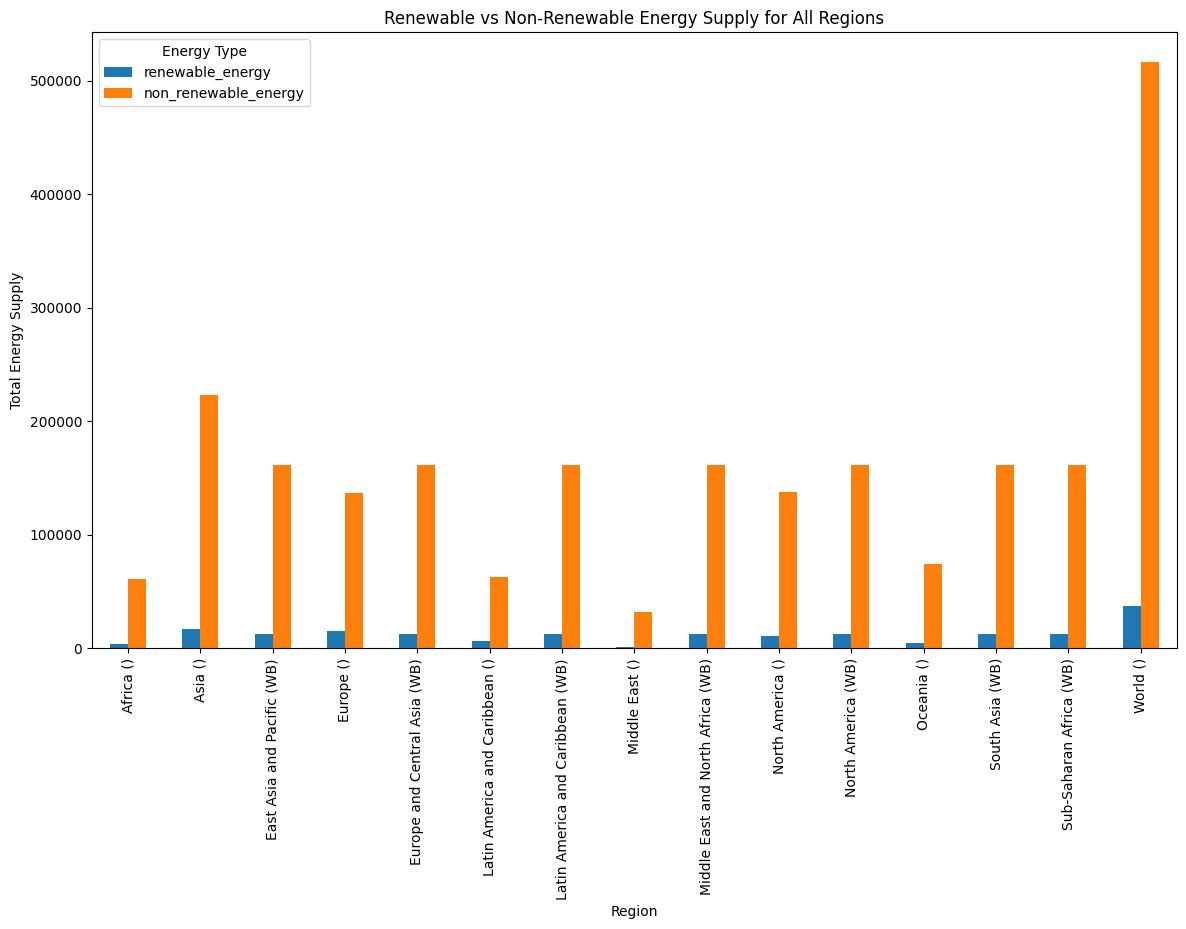

d. Positive correlation between Urban population share and electricity access percentage: The upward sloping pattern reveals a direct relationship. As the proportion of urban population grows, the likelihood of accessible electricity also rises, indicating potential link between urbanization and improved energy access.

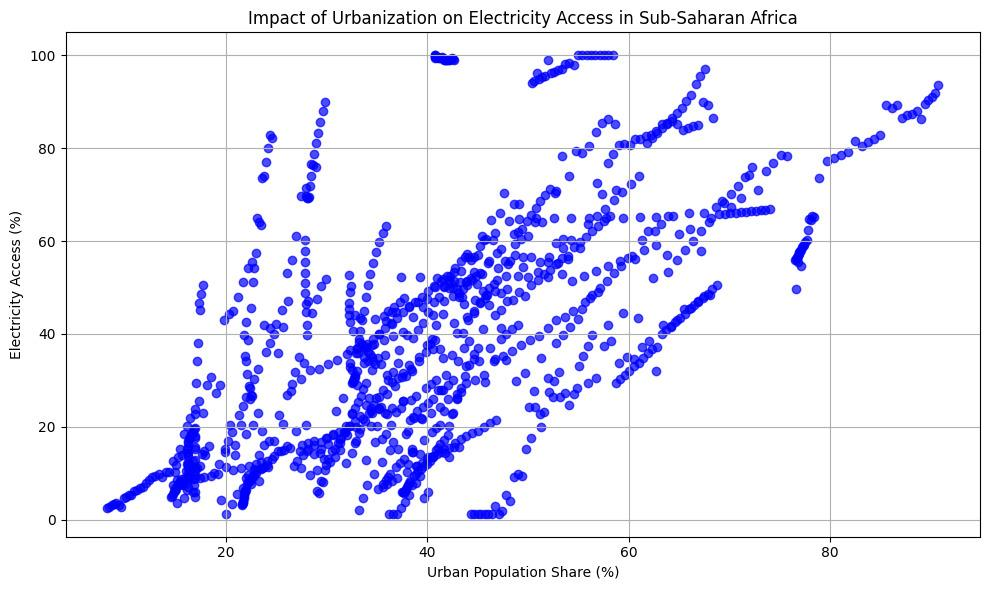

e. Significant disparity between urban and rural areas. Currently, over 50% of the urban population has access to electricity, with a noticeable upward trajectory over time. Rural areas lag behind, with electricity access hovering around 20%, exhibiting only a marginal increase over time.

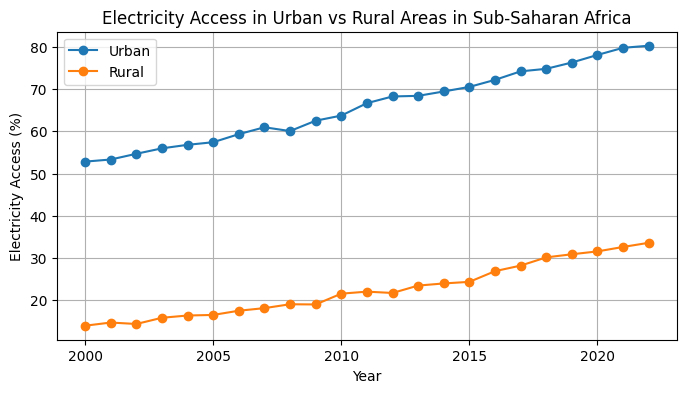

f. Relationship between per capita income and electricity access: While a significant cluster of individuals with lower per capita income indeed have limited electricity access, surprisingly, even those with higher per capita income do not necessarily have access to electricity. This suggests that income alone is not a definitive predictor of electricity access.

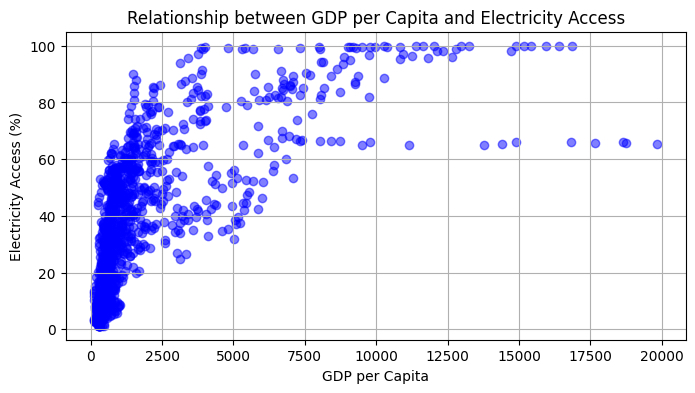

**Modeling & Evaluation.** Three approaches were planned to address the statement problem:

**1. GRADIENT BOOSTING -** a preliminary step of knowing how the model performs with the data. GradientBoostingRegressor, a submodule imported from ensemble was fitted to the train set subsetted by the features, which were considered to have most effect on the target variable, GAP. The performance was measured on MSE and RMSE. Evaluation Result:

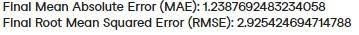

**2. SEQUENTIAL MODEL WITH DENSE LAYER:** This approach applied the effects of neutral network in solving the assigned task. A sequential model is imported from keras, a submodule from tensorflow with a dense layer of 64 nodes and relu as the activation function with a dropout layer of 0.5 as the input layer, dense layer 32 nodes and relu as the activation function for the hidden layer with a dropout of 0.5 and a final layer of a dense layer with 1 layer for the outcome, which was compile with adam as the optimizer and the loss was measured on mean squared error. The performance of the neural network with one hidden layer was accessed through RMSE:.

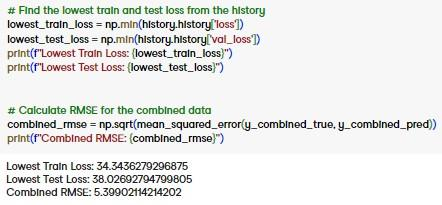

**From the above results,**
The model performance is satisfactory with an RMSE of approximately 5.3.
There is no significant difference between the train loss and test loss, indicating that the model is not overfitting.
However, both train and test losses (approximately 34 and 38, respectively) suggest that the model's predictions are still somewhat distant from the actual values.

**3. SEQUENTIAL MODEL WITH LSTM LAYER:** This approach is similar to the previous application of neural network except that the LSTM layer was applied rather than the dense layer. The hidden layer was a LSTM layer with 50 nodes and relu as the activation function with a dropout of 0.5 to prevent overfitting and the final layer with dense layer of 1 node. The performance of the LSTMl was evaluated on its RMSE.

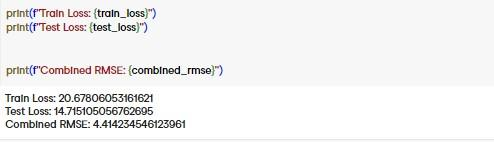

The results demonstrate that the LSTM model has outperformed the previous models, achieving significantly lower train and test losses, along with a reduced combined RMSE of 4.4. The lower train and test losses indicate that the model has learned the patterns in the data more effectively, resulting in better generalization to the test set.

**Recommendations.** It is recommended that:

--Additional features should be recorded for each observation to ensure the model receives sufficient data for more accurate predictions.
--More data is needed to adequately train the model for improved predictive insights.
Generative AI models perform better with larger datasets. For this task, the data collected was only suitable given the limited computational power available, which should be enhanced for further analysis.

**Conclusion.** In this study, we leveraged a sequential model with a long short-term memory layer, compiled using generative AI, to forecast electrification demand and supply gaps in Sub-Saharan Africa. Our results show that this approach outperformed other machine learning algorithms, achieving superior accuracy in predicting energy gaps. With a focus on promoting sustainable and equitable electrification, our research demonstrates the potential of machine learning to advance universal energy access and enhance socio-economic development in Sub-Saharan Africa. By addressing the electricity demand and supply gaps, our findings can inform policy and investment decisions, ultimately contributing to a more energy-secure and prosperous future for the region.

**References:**
[1] African Union Commission. (2021). "Agenda 2063: The Africa We Want." Retrieved from https://au.int/en/agenda2063/overview.

[2] International Energy Agency. (2023). "Tracking SDG 7: The Energy Progress Report 2023." Retrieved from https://www.iea.org/reports/tracking-sdg7.

[3] World Health Organization. (2022). "Access to Electricity in Sub-Saharan Africa." Retrieved from https://www.who.int/news-room/fact-sheets/detail/electrification-in-africa.

[4] United Nations. (2023). "Tracking SDG 7: The Energy Progress Report." Retrieved from https://sdg7.org/reports/2023-energy-progress-report.

[5] World Bank. (2020). "Barriers to Urban Electrification in Sub-Saharan Africa: A Perspective from End-Users." Retrieved from https://blogs.worldbank.org/en/developmenttalk/barriers-urban-electrification-sub-saharan-africa-perspective-end-users.

Connected to Python 3 Google Compute Engine backend
execute my_notebook.ipynb